In [ ]:
YIELD FOR O2 uptake and CO2 excretion with dryweight

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
time = [0, 1, 2, 2.75, 3.5, 4.25, 5, 5.5]

In [92]:
df_target=pd.read_csv(r'C:\Users\gosse\Desktop\reseach project\target_values_TOM2.csv',sep=';')
df_target['Time (h)']=df_target['Time (h) 2024-05-15T09.20.45.392']
df_target.drop(['Time (h) 2024-05-15T09.20.45.392'],axis=1,inplace=True)
df_target=df_target.set_index('Time (h)')
#df_target.drop((col for col in df_target.columns if not "OTR" in col or "CTR" in col),axis=1,inplace=True)
#df_target.dropna(axis=1,inplace=True)
df_target

,WT-measurement D1 OTR (mmol/L/h),WT-measurement D1 CTR (mmol/L/h),WT-measurement D1 RQ,WT-measurement D1 integral OTR (mmol/L),WT-measurement D1 integral CTR (mmol/L),WT-measurement D1 O2 cal. factor (Pa/V),Unnamed: 7,Time (h) 2024-05-15T09.20.46.428,MT-measurement D2 OTR (mmol/L/h),MT-measurement D2 CTR (mmol/L/h),...,Unnamed: 23,Time (h) 2024-05-15T09.20.44.901,MT-sample D4 OTR (mmol/L/h),MT-sample D4 CTR (mmol/L/h),MT-sample D4 RQ,MT-sample D4 integral OTR (mmol/L),MT-sample D4 integral CTR (mmol/L),MT-sample D4 O2 cal. factor (Pa/V),Unnamed: 31,Unnamed: 32
Time (h),,,,,,,,,,,,,,,,,,,,,
0.33244,-0.508615,0.125628,-0.247000,-0.169538,0.041876,9824.139228,NaN,0.33237,-0.639657,0.029924,...,NaN,0.33245,-31.539643,0.042101,-0.001335,-10.513214,0.014034,95386.749983,NaN,NaN
0.66719,0.165347,0.159909,0.967110,-0.114423,0.095179,9822.607445,NaN,0.66579,0.894493,0.031645,...,NaN,0.66719,-11.975442,0.040711,-0.003400,-14.505028,0.027604,88932.139949,NaN,NaN
1.00055,0.292535,0.174966,0.598102,-0.016911,0.153501,9826.787532,NaN,1.00051,1.095048,0.031934,...,NaN,1.00056,-3.731535,0.044641,-0.011963,-15.748873,0.042485,90577.084605,NaN,NaN
1.33393,-0.390573,0.190847,-0.488632,-0.147102,0.217116,9852.987477,NaN,1.33385,-0.299663,0.037772,...,NaN,1.33394,-1.037513,0.046414,-0.044735,-16.094711,0.057956,89422.085683,NaN,NaN
1.66869,0.240361,0.216372,0.900196,-0.066982,0.289240,9845.490182,NaN,1.66857,0.389197,0.032521,...,NaN,1.66870,-2.881759,0.037496,-0.013011,-17.055298,0.070454,88902.792341,NaN,NaN
2.00207,0.296142,0.245121,0.827714,0.031732,0.370947,9848.297869,NaN,2.00191,0.562743,0.052015,...,NaN,2.00208,-3.799410,1.885038,-0.496140,-18.321768,0.698800,88425.174999,NaN,NaN
2.33545,0.030632,0.290958,9.498410,0.041943,0.467933,9844.690995,NaN,2.33524,-0.028999,0.040108,...,NaN,2.33685,-0.242488,0.039408,-0.162515,-18.402597,0.711936,88448.600306,NaN,NaN
2.67021,0.210814,0.334937,1.588780,0.112214,0.579579,9852.754585,NaN,2.66997,0.331109,0.056318,...,NaN,2.67022,0.254639,0.059324,0.232972,-18.317717,0.731711,87764.394907,NaN,NaN
3.00359,-0.806640,0.383724,-0.475707,-0.156666,0.707487,9876.208280,NaN,3.00330,-0.706229,0.064592,...,NaN,3.00360,-1.669250,0.065830,-0.039437,-18.874134,0.753654,88144.487885,NaN,NaN


In [93]:
df_target_OTR=df_target[[col for col in df_target.columns if "OTR" in col]].copy()
df_target_OTR.drop((col for col in df_target_OTR.columns if not "integral" in col), axis = 1, inplace=True)
#df_target_OTR.dropna(axis=0,inplace=True)
df_target_OTR
time = [0, 1, 2, 2.75, 3.5, 4.25, 5, 5.5]
threshold = 0.2
# Remove close timepoints
filtered_time = [t2 for t2 in df_target_OTR.index if all(abs(t2 - t1) >= threshold for t1 in time)]
df_target_OTR=df_target_OTR.loc[filtered_time].copy()
df_target_OTR
df_target_CTR=df_target[[col for col in df_target.columns if "CTR" in col]].copy()
#df_target_CTR.drop((col for col in df_target_CTR.columns if not "integral" in col), axis = 1, inplace=True)
#df_target_OTR.dropna(axis=0,inplace=True)
df_target_CTR
time= [0, 1.25, 2, 2.75, 3.5, 4.25, 5]
threshold = 0.2
# Remove close timepoints
filtered_time = [t2 for t2 in df_target_CTR.index if all(abs(t2 - t1) >= threshold for t1 in time)]
df_target_CTR=df_target_CTR.loc[filtered_time].copy()
df_target_OTR

,WT-measurement D1 integral OTR (mmol/L),MT-measurement D2 integral OTR (mmol/L),WT-sample D3 integral OTR (mmol/L),MT-sample D4 integral OTR (mmol/L)
Time (h),,,,
0.33244,-0.169538,-0.213219,-0.061659,-10.513214
0.66719,-0.114423,0.084946,0.068199,-14.505028
1.33393,-0.147102,0.350074,0.677822,-16.094711
1.66869,-0.066982,0.479806,0.875624,-17.055298
2.33545,0.041943,0.657721,-9.813881,-18.402597
3.00359,-0.156666,0.532681,-9.508263,-18.874134
4.00516,-0.358817,0.373357,-8.883599,-19.810136
4.67330,0.111523,0.998702,-6.317122,-18.895871


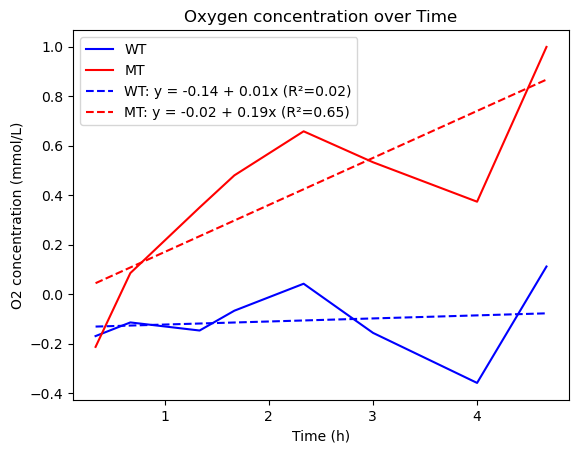

In [94]:
def deltaS(type):
    first_point = type.iloc[0]
    last_point = type.iloc[-1]
    return first_point, last_point

df_target_OTR['Time (h)'] = df_target_OTR.index
# Calculate deltaS for WT and MT
WT_S_first, WT_S_last = deltaS(df_target_OTR['WT-measurement D1 integral OTR (mmol/L)'])
MT_S_first, MT_S_last = deltaS(df_target_OTR['MT-measurement D2 integral OTR (mmol/L)'])

# Plot the data
plt.plot(df_target_OTR['Time (h)'], df_target_OTR['WT-measurement D1 integral OTR (mmol/L)'], label='WT', color='blue')
plt.plot(df_target_OTR['Time (h)'], df_target_OTR['MT-measurement D2 integral OTR (mmol/L)'], label='MT', color='red')

# Perform linear regression for WT
slope_WT, intercept_WT = np.polyfit(df_target_OTR['Time (h)'], df_target_OTR['WT-measurement D1 integral OTR (mmol/L)'], 1)
linear_line_WT = intercept_WT + slope_WT * df_target_OTR['Time (h)']
r2_WT = r2_score(df_target_OTR['WT-measurement D1 integral OTR (mmol/L)'], linear_line_WT)
WT_formula = f'WT: y = {intercept_WT:.2f} + {slope_WT:.2f}x (R²={r2_WT:.2f})'
plt.plot(df_target_OTR['Time (h)'], linear_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform linear regression for MT
slope_MT, intercept_MT = np.polyfit(df_target_OTR['Time (h)'], df_target_OTR['MT-measurement D2 integral OTR (mmol/L)'], 1)
linear_line_MT = intercept_MT + slope_MT * df_target_OTR['Time (h)']
r2_MT = r2_score(df_target_OTR['MT-measurement D2 integral OTR (mmol/L)'], linear_line_MT)
MT_formula = f'MT: y = {intercept_MT:.2f} + {slope_MT:.2f}x (R²={r2_MT:.2f})'
plt.plot(df_target_OTR['Time (h)'], linear_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('O2 concentration (mmol/L)')
plt.title('Oxygen concentration over Time')
plt.legend(loc='upper left')
plt.show()

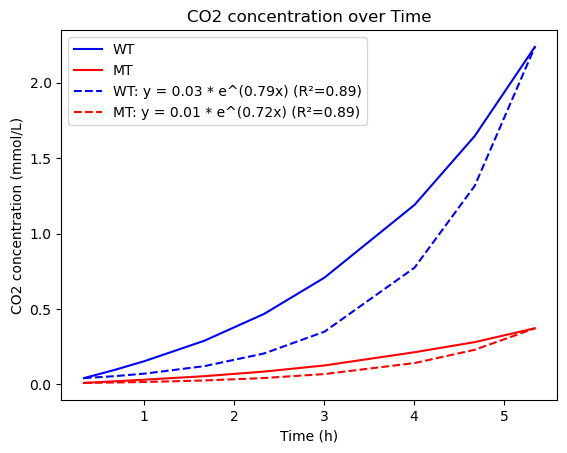

In [95]:
def deltaS(type):
    first_point = type.iloc[0]
    last_point = type.iloc[-1]
    return first_point, last_point

# Assuming df_target_CTR is defined and has the required data
df_target_CTR['Time (h)'] = df_target_CTR.index

# Calculate deltaS for WT and MT
WT_S_first, WT_S_last = deltaS(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'])
MT_S_first, MT_S_last = deltaS(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'])

# Plot the data
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'], label='WT', color='blue')
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'], label='MT', color='red')

# Perform exponential regression for WT
time = df_target_CTR['Time (h)']
log_WT_S_first = np.log(WT_S_first)
log_WT_S_last = np.log(WT_S_last)
slope_WT = (log_WT_S_last - log_WT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_WT = log_WT_S_first - slope_WT * time.iloc[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time)
r2_WT = r2_score(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'], exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_S_first)
log_MT_S_last = np.log(MT_S_last)
slope_MT = (log_MT_S_last - log_MT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_MT = log_MT_S_first - slope_MT * time.iloc[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time)
r2_MT = r2_score(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'], exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('CO2 concentration (mmol/L)')
plt.title('CO2 concentration over Time')
plt.legend(loc='upper left')
plt.show()

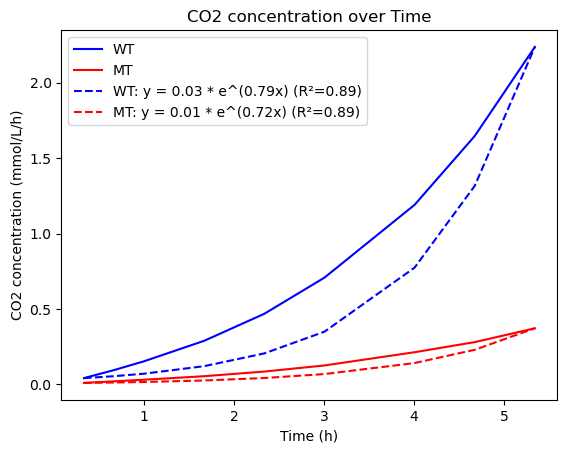

In [96]:
def deltaS(type):
    first_point = type.iloc[0]
    last_point = type.iloc[-1]
    return first_point, last_point

# Assuming df_target_CTR is defined and has the required data
df_target_CTR['Time (h)'] = df_target_CTR.index

# Calculate deltaS for WT and MT
WT_S_first, WT_S_last = deltaS(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'])
MT_S_first, MT_S_last = deltaS(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'])

# Plot the data
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'], label='WT', color='blue')
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'], label='MT', color='red')

# Perform exponential regression for WT
time = df_target_CTR['Time (h)']
log_WT_S_first = np.log(WT_S_first)
log_WT_S_last = np.log(WT_S_last)
slope_WT = (log_WT_S_last - log_WT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_WT = log_WT_S_first - slope_WT * time.iloc[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time)
r2_WT = r2_score(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'], exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_S_first)
log_MT_S_last = np.log(MT_S_last)
slope_MT = (log_MT_S_last - log_MT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_MT = log_MT_S_first - slope_MT * time.iloc[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time)
r2_MT = r2_score(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'], exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('CO2 concentration (mmol/L/h)')
plt.title('CO2 concentration over Time')
plt.legend(loc='upper left')
plt.show()

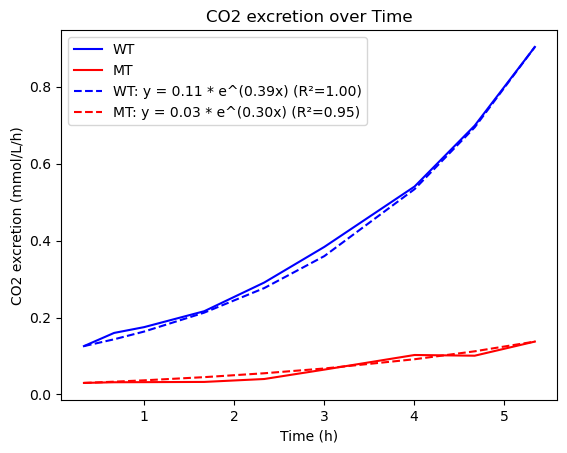

In [123]:
def deltaS(type):
    first_point = type.iloc[0]
    last_point = type.iloc[-1]
    return first_point, last_point

# Assuming df_target_CTR is defined and has the required data
df_target_CTR['Time (h)'] = df_target_CTR.index

# Calculate deltaS for WT and MT
WT_S_first, WT_S_last = deltaS(df_target_CTR['WT-measurement D1 CTR (mmol/L/h)'])
MT_S_first, MT_S_last = deltaS(df_target_CTR['MT-measurement D2 CTR (mmol/L/h)'])

# Plot the data
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['WT-measurement D1 CTR (mmol/L/h)'], label='WT', color='blue')
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['MT-measurement D2 CTR (mmol/L/h)'], label='MT', color='red')

# Perform exponential regression for WT
time = df_target_CTR['Time (h)']
log_WT_S_first = np.log(WT_S_first)
log_WT_S_last = np.log(WT_S_last)
slope_WT = (log_WT_S_last - log_WT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_WT = log_WT_S_first - slope_WT * time.iloc[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time)
r2_WT = r2_score(df_target_CTR['WT-measurement D1 CTR (mmol/L/h)'], exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_S_first)
log_MT_S_last = np.log(MT_S_last)
slope_MT = (log_MT_S_last - log_MT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_MT = log_MT_S_first - slope_MT * time.iloc[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time)
r2_MT = r2_score(df_target_CTR['MT-measurement D2 CTR (mmol/L/h)'], exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('CO2 excretion (mmol/L/h)')
plt.title('CO2 excretion over Time')
plt.legend(loc='upper left')
plt.show()

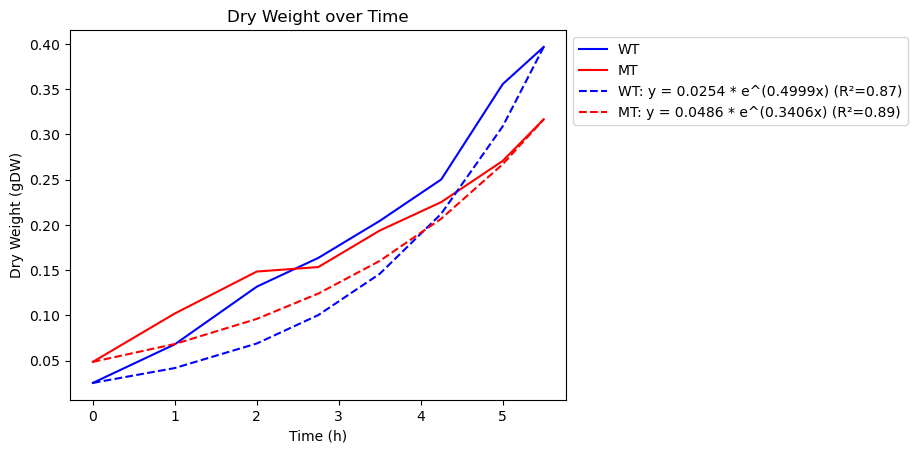

In [99]:
cellcount = pd.read_csv(r'C:\Users\gosse\Desktop\reseach project\TOM2_Cellcounts.csv', sep=';')

# Measured dry weights
WT_dryweight_measured = [0.1120, 0.1239]
MT_dryweight_measured = [0.1155, 0.1250]

# Time points
time = [0, 1, 2, 2.75, 3.5, 4.25, 5, 5.5]

def calculate_weightpercell(type, dryweight, cellcount):
    cells = cellcount[type].iloc[-1]
    convert = (dryweight[-1] - dryweight[0]) * 33.33
    weight_per_cell = convert / cells
    points = []
    for x in cellcount[type]:
        weight = x * weight_per_cell
        points.append(weight)
    return points

# Calculate weight data for WT and MT
WT_weightdata = calculate_weightpercell('WT', WT_dryweight_measured, cellcount)
MT_weightdata = calculate_weightpercell('MT', MT_dryweight_measured, cellcount)

plt.plot(time, WT_weightdata, color='blue', label='WT')
plt.plot(time, MT_weightdata, color='red', label='MT')

# Function for exponential regression using first and last points
def exponential_regression(time, values):
    first_point = values[0]
    last_point = values[-1]
    time_range = time[-1] - time[0]
    
    # Calculate growth rate using natural logarithm
    if first_point > 0 and last_point > 0:
        b = np.log(last_point / first_point) / time_range
        a = first_point
    else:
        b = 0
        a = 0
    
    # Generate exponential line
    exp_line = [a * np.exp(b * t) for t in time]
    
    return exp_line, a, b

# Perform exponential regression for WT
exp_line_WT, a_WT, b_WT = exponential_regression(time, WT_weightdata)
r2_WT = r2_score(WT_weightdata, exp_line_WT)
WT_formula = f'WT: y = {a_WT:.4f} * e^({b_WT:.4f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
exp_line_MT, a_MT, b_MT = exponential_regression(time, MT_weightdata)
r2_MT = r2_score(MT_weightdata, exp_line_MT)
MT_formula = f'MT: y = {a_MT:.4f} * e^({b_MT:.4f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('Dry Weight (gDW)')
plt.title('Dry Weight over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

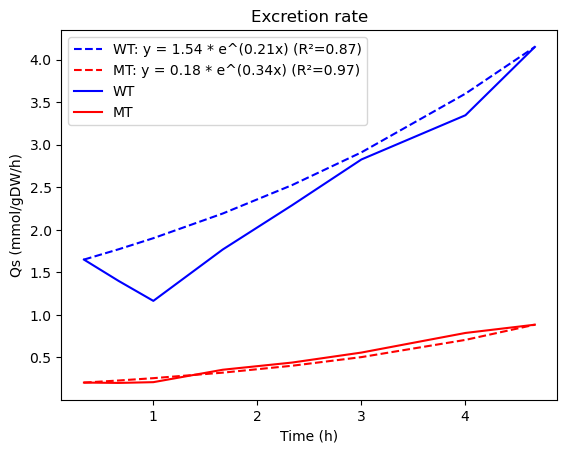

In [126]:
def deltaS(data):
    first_point = data[0]
    last_point = data[-1]  # Exclude the last point
    return first_point, last_point

# Assuming df_target_CTR, WT_weightdata, and MT_weightdata are already defined

time = df_target_CTR['Time (h)'].values[:-1]  # Adjusted to exclude the last point

# Adjusted lengths to exclude the last point
WT_S_first, WT_S_last = deltaS(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'].values[:-1] / WT_weightdata)
MT_S_first, MT_S_last = deltaS(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'].values[:-1] / MT_weightdata)

# Calculate Qs in g/gDW/h
WT_Qs = df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'].values[:-1] / WT_weightdata
MT_Qs = df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'].values[:-1] / MT_weightdata

# Perform exponential regression for WT
log_WT_S_first = np.log(WT_Qs[0])
log_WT_S_last = np.log(WT_Qs[-1])
slope_WT = (log_WT_S_last - log_WT_S_first) / (time[-1] - time[0])
intercept_WT = log_WT_S_first - slope_WT * time[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time)
r2_WT = r2_score(WT_Qs, exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_Qs[0])
log_MT_S_last = np.log(MT_Qs[-1])
slope_MT = (log_MT_S_last - log_MT_S_first) / (time[-1] - time[0])
intercept_MT = log_MT_S_first - slope_MT * time[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time)
r2_MT = r2_score(MT_Qs, exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Plot the data
plt.plot(time, WT_Qs, color='blue', label='WT')
plt.plot(time, MT_Qs, color='red', label='MT')

plt.xlabel('Time (h)')
plt.ylabel('Qs (mmol/gDW/h)')
plt.title('Excretion rate')
plt.legend()
plt.show()

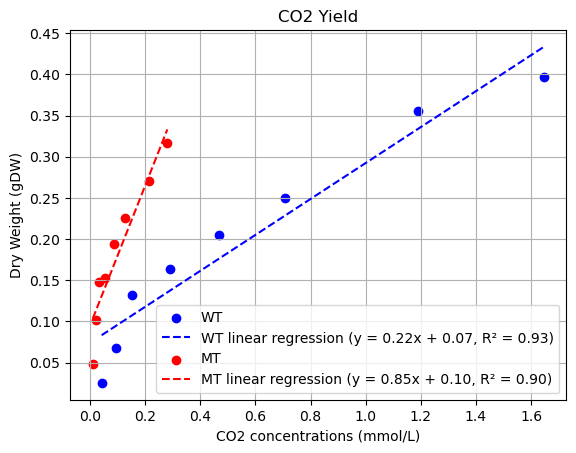

In [137]:
plt.scatter(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'].iloc[:-1], WT_weightdata, color='blue', marker='o', label='WT')

# Perform linear regression for WT data
slope_WT, intercept_WT = np.polyfit(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'].iloc[:-1], WT_weightdata, 1)

# Calculate R-squared value for WT data
residuals_WT = WT_weightdata - (slope_WT * df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'].iloc[:-1] + intercept_WT)
ss_res_WT = np.sum(np.square(residuals_WT))
ss_tot_WT = np.sum(np.square(WT_weightdata - np.mean(WT_weightdata)))
r_squared_WT = 1 - (ss_res_WT / ss_tot_WT)

# Plot the regression line for WT data
plt.plot(df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'].iloc[:-1], slope_WT * df_target_CTR['WT-measurement D1 integral CTR (mmol/L)'].iloc[:-1] + intercept_WT, color='blue', linestyle='--', label=f'WT linear regression (y = {slope_WT:.2f}x + {intercept_WT:.2f}, R² = {r_squared_WT:.2f})')

# Scatter plot for MT data
plt.scatter(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'].iloc[:-1], MT_weightdata, color='red', marker='o', label='MT')

# Perform linear regression for MT data
slope_MT, intercept_MT = np.polyfit(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'].iloc[:-1], MT_weightdata, 1)

# Calculate R-squared value for MT data
residuals_MT = MT_weightdata - (slope_MT * df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'].iloc[:-1] + intercept_MT)
ss_res_MT = np.sum(np.square(residuals_MT))
ss_tot_MT = np.sum(np.square(MT_weightdata - np.mean(MT_weightdata)))
r_squared_MT = 1 - (ss_res_MT / ss_tot_MT)

# Plot the regression line for MT data
plt.plot(df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'].iloc[:-1], slope_MT * df_target_CTR['MT-measurement D2 integral CTR (mmol/L)'].iloc[:-1] + intercept_MT, color='red', linestyle='--', label=f'MT linear regression (y = {slope_MT:.2f}x + {intercept_MT:.2f}, R² = {r_squared_MT:.2f})')

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Labels and title
plt.xlabel('CO2 concentrations (mmol/L)')
plt.ylabel('Dry Weight (gDW)')
plt.title('CO2 Yield')
plt.grid(True)
plt.legend()
plt.show()